In [ ]:
#import library yang dibutuhkan
import pandas as pd
import re
import string
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
#import dataset from local computer
from google.colab import files
uploaded = files.upload()

Saving Data Pasien Rawat Inap.xlsx to Data Pasien Rawat Inap.xlsx


In [ ]:
df=pd.read_excel('Data Pasien Rawat Inap.xlsx')

In [ ]:
df

,Nomor Pendaftaran,Tanggal Pendaftaran,Jenis Kelamin,Jenis Perawatan,Ruangan
0,RD2101010002,2021-01-01 00:30:00,PEREMPUAN,Pelayanan Gawat Darurat,Lantai 6
1,RJ2012300022,2021-01-01 08:58:00,PEREMPUAN,Bedah Onkologi,B-Lantai 6
2,RD2012310026,2021-01-01 09:40:00,LAKI-LAKI,Pelayanan Gawat Darurat,B-Lantai 6
3,RD2101010006,2021-01-01 10:29:00,LAKI-LAKI,Pelayanan Gawat Darurat,B-Lantai 10
4,RD2101010007,2021-01-01 10:40:00,PEREMPUAN,Pelayanan Gawat Darurat,B-Lantai 5
...,...,...,...,...,...
19931,RD2206050053,2022-06-05 20:30:00,LAKI-LAKI,Pelayanan Gawat Darurat,B-Lantai 11
19932,RD2206050055,2022-06-05 21:09:00,PEREMPUAN,Pelayanan Gawat Darurat,Lantai 9
19933,RD2206050056,2022-06-05 21:16:00,LAKI-LAKI,Pelayanan Gawat Darurat,B-Lantai 12
19934,RD2206050057,2022-06-05 21:25:00,LAKI-LAKI,Pelayanan Gawat Darurat,B-Lantai 11


Data PreProcessing

In [ ]:
# Mengubah tipe data kolom "Tanggal Pendaftaran" menjadi datetime
df['Tanggal Pendaftaran'] = pd.to_datetime(df['Tanggal Pendaftaran'])

# Mengubah format kolom "Tanggal Pendaftaran" menjadi hanya tahun-bulan-tanggal
df['Tanggal Pendaftaran'] = df['Tanggal Pendaftaran'].dt.strftime('%Y-%m-%d')

# Mengubah kembali tipe data kolom "Tanggal Pendaftaran" menjadi datetime
df['Tanggal Pendaftaran'] = pd.to_datetime(df['Tanggal Pendaftaran'])

In [ ]:
df

,Nomor Pendaftaran,Tanggal Pendaftaran,Jenis Kelamin,Jenis Perawatan,Ruangan
0,RD2101010002,2021-01-01,PEREMPUAN,Pelayanan Gawat Darurat,Lantai 6
1,RJ2012300022,2021-01-01,PEREMPUAN,Bedah Onkologi,B-Lantai 6
2,RD2012310026,2021-01-01,LAKI-LAKI,Pelayanan Gawat Darurat,B-Lantai 6
3,RD2101010006,2021-01-01,LAKI-LAKI,Pelayanan Gawat Darurat,B-Lantai 10
4,RD2101010007,2021-01-01,PEREMPUAN,Pelayanan Gawat Darurat,B-Lantai 5
...,...,...,...,...,...
19931,RD2206050053,2022-06-05,LAKI-LAKI,Pelayanan Gawat Darurat,B-Lantai 11
19932,RD2206050055,2022-06-05,PEREMPUAN,Pelayanan Gawat Darurat,Lantai 9
19933,RD2206050056,2022-06-05,LAKI-LAKI,Pelayanan Gawat Darurat,B-Lantai 12
19934,RD2206050057,2022-06-05,LAKI-LAKI,Pelayanan Gawat Darurat,B-Lantai 11


In [ ]:
df.dtypes

Nomor Pendaftaran              object
Tanggal Pendaftaran    datetime64[ns]
Jenis Kelamin                  object
Jenis Perawatan                object
Ruangan                        object
dtype: object

Normalisasi data

Menampilkan kolom "Jenis Kelamin" dengan nilai 0 untuk "Laki-laki" dan 1 untuk "Perempuan".

In [ ]:
# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()

# Mengubah kolom "Jenis Kelamin" menjadi representasi numerik
df['Jenis Kelamin'] = label_encoder.fit_transform(df['Jenis Kelamin'])

# Cetak hasil perubahan
print(df['Jenis Kelamin'])


0        1
1        1
2        0
3        0
4        1
        ..
19931    0
19932    1
19933    0
19934    0
19935    1
Name: Jenis Kelamin, Length: 19936, dtype: int64


Data Cleaning

Jika outputnya adalah 0 untuk setiap kolom, itu berarti tidak ada nilai yang hilang dalam kolom-kolom tersebut. Ini bisa dianggap sebagai hasil yang baik karena tidak ada data yang hilang atau perlu ditangani lebih lanjut.

In [ ]:
# Mengecek jumlah nilai yang hilang (missing values) pada setiap kolom
missing_values = df[['Tanggal Pendaftaran', 'Jenis Kelamin', 'Jenis Perawatan']].isnull().sum()

# Cetak hasil pengecekan
print(missing_values)

Tanggal Pendaftaran    0
Jenis Kelamin          0
Jenis Perawatan        0
dtype: int64


In [ ]:
df

,Nomor Pendaftaran,Tanggal Pendaftaran,Jenis Kelamin,Jenis Perawatan,Ruangan
0,RD2101010002,2021-01-01,1,Pelayanan Gawat Darurat,Lantai 6
1,RJ2012300022,2021-01-01,1,Bedah Onkologi,B-Lantai 6
2,RD2012310026,2021-01-01,0,Pelayanan Gawat Darurat,B-Lantai 6
3,RD2101010006,2021-01-01,0,Pelayanan Gawat Darurat,B-Lantai 10
4,RD2101010007,2021-01-01,1,Pelayanan Gawat Darurat,B-Lantai 5
...,...,...,...,...,...
19931,RD2206050053,2022-06-05,0,Pelayanan Gawat Darurat,B-Lantai 11
19932,RD2206050055,2022-06-05,1,Pelayanan Gawat Darurat,Lantai 9
19933,RD2206050056,2022-06-05,0,Pelayanan Gawat Darurat,B-Lantai 12
19934,RD2206050057,2022-06-05,0,Pelayanan Gawat Darurat,B-Lantai 11


Exploratory Data Analysis

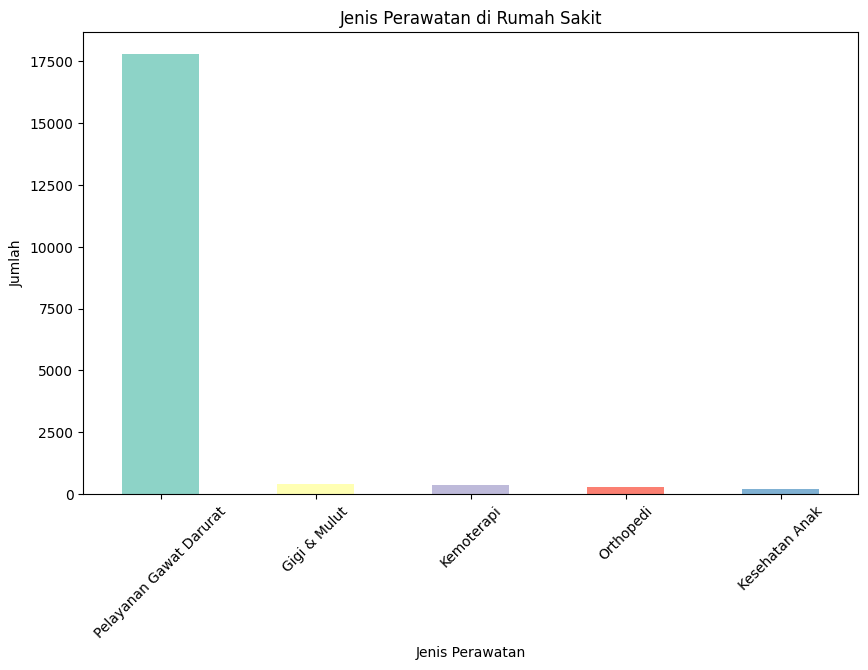

In [ ]:
# Menghitung jumlah setiap jenis perawatan
perawatan_counts = df['Jenis Perawatan'].value_counts().head(5)

# Membuat plot bar dengan variasi warna
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(np.arange(len(perawatan_counts)))
perawatan_counts.plot(kind='bar', color=colors)
plt.title('Jenis Perawatan di Rumah Sakit')
plt.xlabel('Jenis Perawatan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

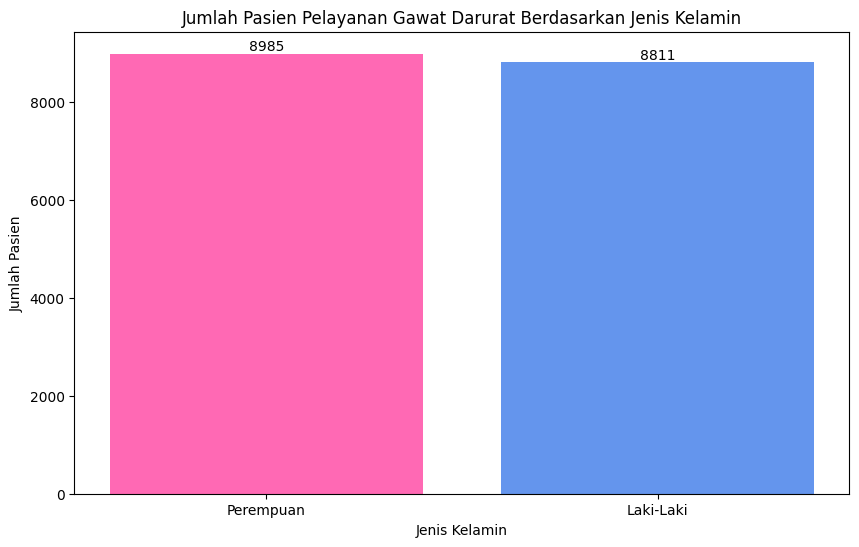

In [ ]:
# Menghitung jumlah pasien perempuan dan laki-laki dengan Pelayanan Gawat Darurat
perempuan_counts = df[(df['Jenis Kelamin'] == 1) & (df['Jenis Perawatan'] == 'Pelayanan Gawat Darurat')].shape[0]
laki_counts = df[(df['Jenis Kelamin'] == 0) & (df['Jenis Perawatan'] == 'Pelayanan Gawat Darurat')].shape[0]

# Membuat grafik bar
labels = ['Perempuan', 'Laki-Laki']
counts = [perempuan_counts, laki_counts]
colors = ['#FF69B4', '#6495ED']

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=colors)

plt.title('Jumlah Pasien Pelayanan Gawat Darurat Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pasien')

# Menambahkan label jumlah pasien pada setiap bar
for i in range(len(labels)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()

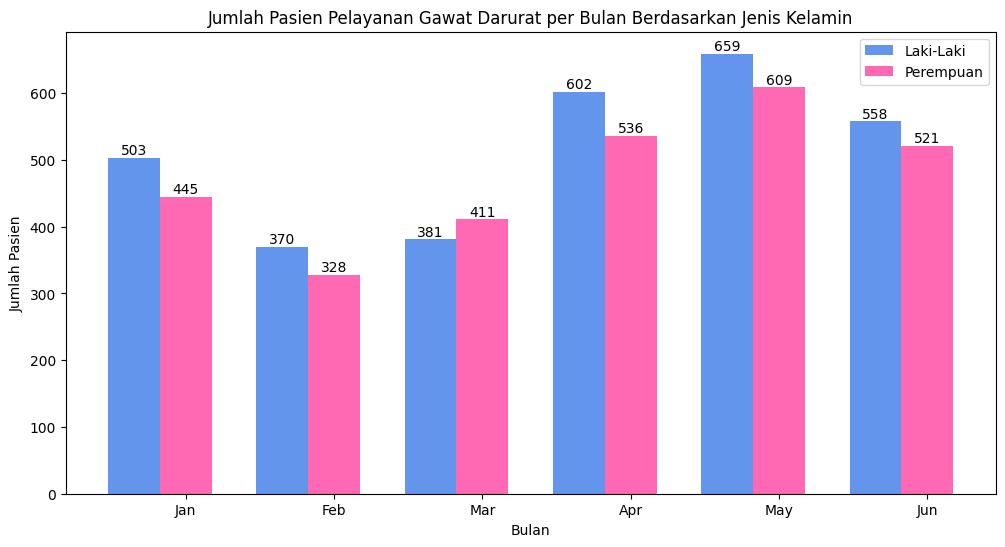

In [ ]:
# Menghitung jumlah pasien perempuan dan laki-laki per bulan dengan Pelayanan Gawat Darurat
df_filtered = df[df['Jenis Perawatan'] == 'Pelayanan Gawat Darurat']
df_counts = df_filtered.groupby([df_filtered['Tanggal Pendaftaran'].dt.year, df_filtered['Tanggal Pendaftaran'].dt.month, df_filtered['Jenis Kelamin']]).size().unstack(fill_value=0)

# Membuat grafik bar
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
months = range(1, 7)
colors = ['#6495ED', '#FF69B4']
width = 0.35  # Lebar bar

fig, ax = plt.subplots(figsize=(12, 6))

for i, gender in enumerate([0, 1]):
    x = np.arange(len(months)) + i * width
    ax.bar(x, df_counts[gender][:6], width, color=colors[i], label=['Laki-Laki', 'Perempuan'][gender])

    # Menambahkan label jumlah pasien pada setiap bar
    for j, count in enumerate(df_counts[gender][:6]):
        ax.text(x[j], count, str(count), ha='center', va='bottom')

ax.set_title('Jumlah Pasien Pelayanan Gawat Darurat per Bulan Berdasarkan Jenis Kelamin')
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah Pasien')
ax.set_xticks(x - width / 2 + width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

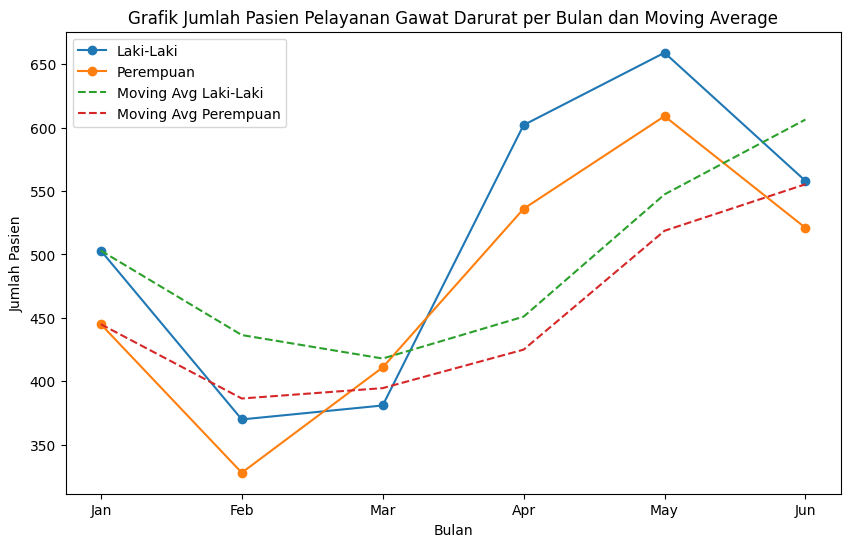

In [ ]:
# Menghitung jumlah pasien perempuan dan laki-laki per bulan dengan Pelayanan Gawat Darurat
df_filtered = df[df['Jenis Perawatan'] == 'Pelayanan Gawat Darurat']
df_counts = df_filtered.groupby([df_filtered['Tanggal Pendaftaran'].dt.year, df_filtered['Tanggal Pendaftaran'].dt.month, df_filtered['Jenis Kelamin']]).size().unstack(fill_value=0)

# Membuat kolom baru untuk moving average
df_counts['Moving Avg Laki-Laki'] = df_counts[0].rolling(window=3, min_periods=1).mean()
df_counts['Moving Avg Perempuan'] = df_counts[1].rolling(window=3, min_periods=1).mean()

# Membuat grafik line untuk jumlah pasien dan moving average
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
months = range(1, 7)

plt.figure(figsize=(10, 6))

plt.plot(months, df_counts[0][:6], marker='o', label='Laki-Laki')
plt.plot(months, df_counts[1][:6], marker='o', label='Perempuan')
plt.plot(months, df_counts['Moving Avg Laki-Laki'][:6], linestyle='--', label='Moving Avg Laki-Laki')
plt.plot(months, df_counts['Moving Avg Perempuan'][:6], linestyle='--', label='Moving Avg Perempuan')

plt.title('Grafik Jumlah Pasien Pelayanan Gawat Darurat per Bulan dan Moving Average')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pasien')
plt.xticks(months, labels)
plt.legend()

plt.show()

K-Means Clustering

In [ ]:
#Pilih kolom "Jenis Perawatan" sebagai fitur:
features = df['Jenis Perawatan']
features

0        Pelayanan Gawat Darurat
1                 Bedah Onkologi
2        Pelayanan Gawat Darurat
3        Pelayanan Gawat Darurat
4        Pelayanan Gawat Darurat
                  ...           
19931    Pelayanan Gawat Darurat
19932    Pelayanan Gawat Darurat
19933    Pelayanan Gawat Darurat
19934    Pelayanan Gawat Darurat
19935    Pelayanan Gawat Darurat
Name: Jenis Perawatan, Length: 19936, dtype: object

In [ ]:
#Encoding variabel kategorikal:
label_encoder = LabelEncoder()
features_encoded = label_encoder.fit_transform(features)

In [ ]:
#Feature scaling (jika diperlukan):
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_encoded_reshaped = features_encoded.reshape(-1, 1)
features_scaled = scaler.fit_transform(features_encoded_reshaped)

In [ ]:
#Penerapan K-Means Clustering
from sklearn.cluster import KMeans

In [ ]:
#Tentukan jumlah klaster yang diinginkan:
k = 3

In [ ]:
#Inisialisasi model K-Means Clustering:
kmeans = KMeans(n_clusters=k, random_state=42)

In [ ]:
#Fitur model ke data rekam medis yang telah dipilih:
kmeans.fit(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
#Evaluasi Hasil Clustering dan Visualisasi
cluster_labels = kmeans.labels_

In [ ]:
#Analisis dan interpretasikan hasil klaster yang terbentuk:
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print(cluster_counts)

{0: 18523, 1: 396, 2: 1017}


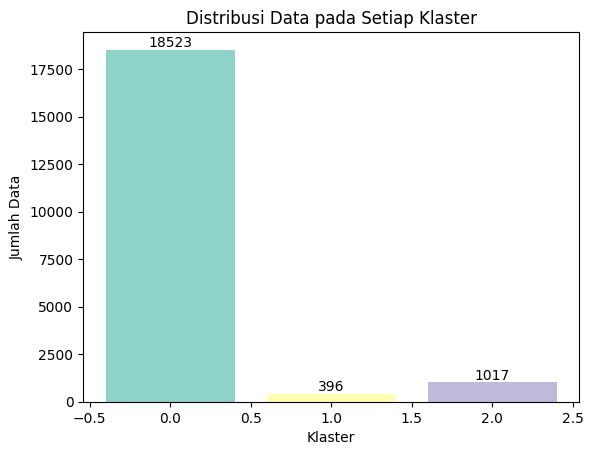

In [ ]:
# Menggunakan palet warna "Set3" dari library seaborn
colors = sns.color_palette("Set3", n_colors=k)

unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)

# plt.figure(figsize=(10, 6))  # Comment out or remove this line
plt.bar(unique_clusters, cluster_counts, color=colors)
plt.xlabel('Klaster')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Data pada Setiap Klaster')

# Menambahkan label jumlah data pada setiap bar
for i in range(len(unique_clusters)):
    plt.text(unique_clusters[i], cluster_counts[i], str(cluster_counts[i]), ha='center', va='bottom')

plt.show()

Inertia adalah salah satu metrik evaluasi dalam algoritma K-means clustering yang mengukur seberapa baik titik-titik data dalam sebuah klaster berada dalam jarak yang relatif dekat dengan pusat klasternya. Inertia diperoleh dengan menjumlahkan kuadrat jarak antara setiap titik data dengan pusat klaster terdekatnya.

Dalam konteks nilai inertia yang diberikan (20.531562274290636), semakin rendah nilai inertia, semakin baik kualitas klasteringnya. Hal ini menunjukkan bahwa titik-titik data dalam klaster cenderung berada dalam jarak yang relatif dekat dengan pusat klasternya, sehingga klastering tersebut dianggap baik.

In [ ]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 20.531562274290636


Hasil penelitian menggunakan metode K-Means Clustering dengan Silhouette Score sebesar 0.9610958249269815 menunjukkan bahwa klasterisasi data yang dilakukan cukup baik. Silhouette Score berkisar antara -1 hingga 1, dengan nilai yang lebih tinggi menunjukkan tingkat pemisahan yang lebih baik antara klaster.

Sebuah Silhouette Score sebesar 0.9610958249269815 menunjukkan bahwa setiap sampel cenderung cocok dengan klasternya sendiri dengan baik dan memiliki jarak yang cukup jauh dengan klaster tetangga terdekat. Hal ini mengindikasikan bahwa klasterisasi data yang dihasilkan relatif konsisten dan baik dalam memisahkan kelompok data.

Silhouette Score yang tinggi juga mengindikasikan bahwa pilihan jumlah klaster yang digunakan dalam analisis mungkin sesuai dengan struktur data yang ada. Jika Silhouette Score lebih rendah, ini bisa menjadi pertanda bahwa data tidak memiliki struktur yang jelas atau jumlah klaster yang digunakan tidak optimal.

In [ ]:
silhouette_avg = silhouette_score(features_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.9610958249269815


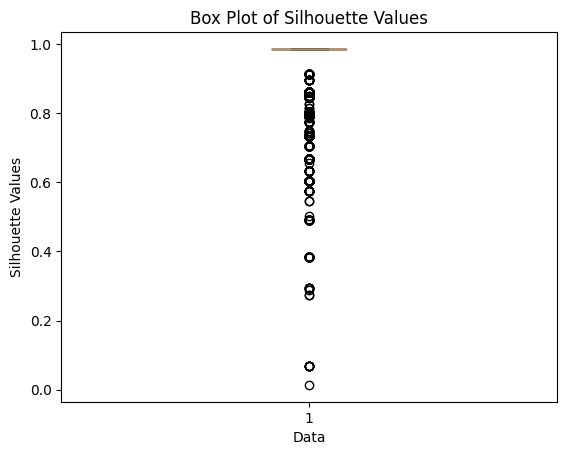

In [ ]:
# Menghitung silhouette score untuk setiap sampel
silhouette_values = silhouette_samples(features_scaled, cluster_labels)

#Box Plot
plt.boxplot(silhouette_values)
plt.xlabel("Data")
plt.ylabel("Silhouette Values")
plt.title("Box Plot of Silhouette Values")
plt.show()

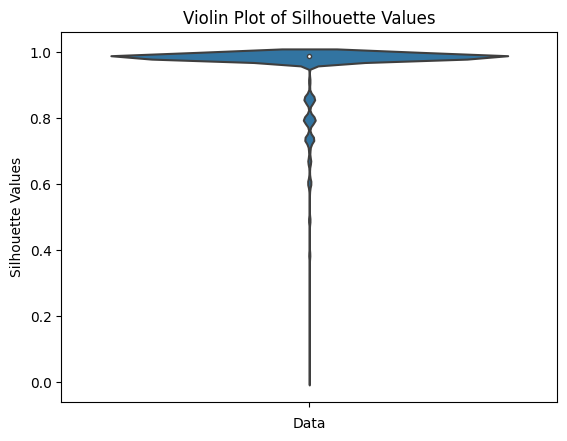

In [ ]:
#Violin Plot:
sns.violinplot(y=silhouette_values)
plt.xlabel("Data")
plt.ylabel("Silhouette Values")
plt.title("Violin Plot of Silhouette Values")
plt.show()

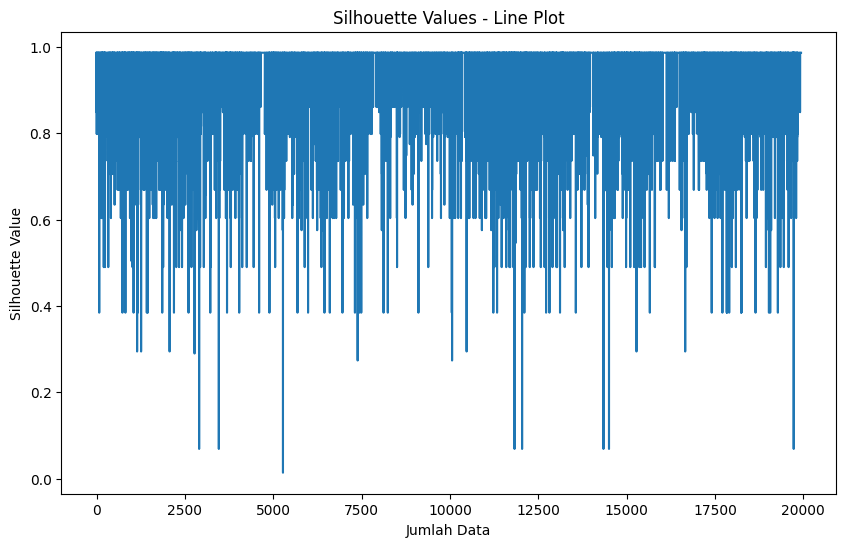

In [ ]:
# Line Plot Silhouette Values
plt.figure(figsize=(10, 6))
plt.plot(range(len(silhouette_values)), silhouette_values)
plt.xlabel("Jumlah Data")
plt.ylabel("Silhouette Value")
plt.title("Silhouette Values - Line Plot")
plt.show()

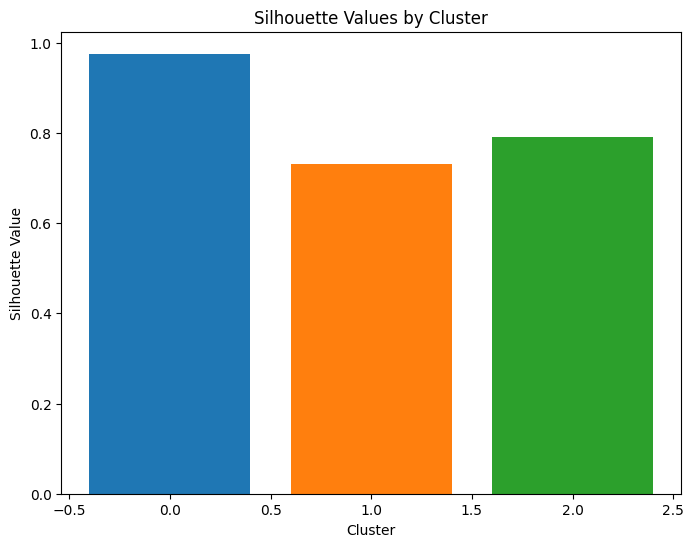

In [ ]:
# Menghitung jumlah unik label klaster
num_clusters = len(np.unique(cluster_labels))

# Menghitung nilai silhouette rata-rata per klaster
silhouette_avg_by_cluster = []
for i in range(num_clusters):
    avg_value = np.mean(silhouette_values[cluster_labels == i])
    silhouette_avg_by_cluster.append(avg_value)

# Membuat palet warna yang lebih tenang
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Membuat bar plot silhouette values by cluster dengan warna yang berbeda
plt.figure(figsize=(8, 6))
plt.bar(range(num_clusters), silhouette_avg_by_cluster, color=color_palette[:num_clusters])
plt.xlabel("Cluster")
plt.ylabel("Silhouette Value")
plt.title("Silhouette Values by Cluster")
plt.show()